**Reading & Understanding Data**

Analisis data ojek online menggunakan dataset dari transaksi ojek online di Pontianak, Kalimantan Barat. 

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('ojol_transactions_pontianak.xlsx')
df.head(3)

,id,date_order,date_finished,mode,from_alamat,from_kelurahan,from_kecamatan,from_lat,from_lng,to_alamat,to_kelurahan,to_kecamatan,to_lat,to_lng,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,customer_name,customer_gender,customer_birthdate,driver_id,driver_name,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1617,2019-03-09 20:45:00,2019-03-09 22:05:00,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,-0.030328,109.298,"Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,-0.061345,109.305406,5.55,2500,0,2500,67,Dian Aryani,P,1994-05-02,90,Rusman Situmorang,L,1997-03-24,MOTOR,Yamaha,NaN,NaN,NaN
1,1297,2019-03-09 19:55:00,2019-03-10 01:38:00,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,-0.028610,109.329,"Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,-0.028571,109.374953,7.08,9000,82000,91000,55,Ajimin Aditya Pangestu,L,2004-04-22,77,Lukman Ganep Januar M.Ak,L,1976-07-26,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,1394,2019-03-09 19:54:00,2019-03-09 21:44:00,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,-0.030186,109.336,"Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,-0.022623,109.319152,4.02,5000,58500,63500,68,Wahyu Simanjuntak,L,2000-07-01,75,Atma Dasa Uwais,L,1985-12-28,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1017 non-null   int64         
 1   date_order                1017 non-null   datetime64[ns]
 2   date_finished             1017 non-null   datetime64[ns]
 3   mode                      1017 non-null   object        
 4   from_alamat               1017 non-null   object        
 5   from_kelurahan            1017 non-null   object        
 6   from_kecamatan            1017 non-null   object        
 7   from_lat                  1017 non-null   float64       
 8   from_lng                  1017 non-null   object        
 9   to_alamat                 1014 non-null   object        
 10  to_kelurahan              1017 non-null   object        
 11  to_kecamatan              1017 non-null   object        
 12  to_lat              

Informasi data diatas menunjukkan bahwa terdapat 3 kolom yang memilliki missing value dengan jumlah yang tidak sedikit, ke-3 kolom tersebut tidak akan saya gunakan dan akan dihapus sebagai upaya dalam pembersihan data. 

In [101]:
df = df.dropna(axis=1)

Selain kolom yang mengandung nilai NaN, saya akan menghapus kolom yang tidak dibutuhkan dalam analisis

In [102]:
df = df.drop(columns=['id', 'from_alamat', 'from_kelurahan', 'from_lat', 'from_lng', 'to_kelurahan', 'to_lat', 'to_lng'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_order                1017 non-null   datetime64[ns]
 1   date_finished             1017 non-null   datetime64[ns]
 2   mode                      1017 non-null   object        
 3   from_kecamatan            1017 non-null   object        
 4   to_kecamatan              1017 non-null   object        
 5   distance                  1017 non-null   float64       
 6   amount_delivery           1017 non-null   int64         
 7   amount_merchant           1017 non-null   int64         
 8   transaction_amount_total  1017 non-null   int64         
 9   customer_id               1017 non-null   int64         
 10  customer_name             1017 non-null   object        
 11  customer_gender           1017 non-null   object        
 12  customer_birthdate  

In [103]:
df.head(3)

,date_order,date_finished,mode,from_kecamatan,to_kecamatan,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,customer_name,customer_gender,customer_birthdate,driver_id,driver_name,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk
0,2019-03-09 20:45:00,2019-03-09 22:05:00,BIKE,PONTIANAK KOTA,PONTIANAK SELATAN,5.55,2500,0,2500,67,Dian Aryani,P,1994-05-02,90,Rusman Situmorang,L,1997-03-24,MOTOR,Yamaha
1,2019-03-09 19:55:00,2019-03-10 01:38:00,FOOD,PONTIANAK KOTA,PONTIANAK TIMUR,7.08,9000,82000,91000,55,Ajimin Aditya Pangestu,L,2004-04-22,77,Lukman Ganep Januar M.Ak,L,1976-07-26,MOTOR,BMW
2,2019-03-09 19:54:00,2019-03-09 21:44:00,SHOP,PONTIANAK KOTA,PONTIANAK BARAT,4.02,5000,58500,63500,68,Wahyu Simanjuntak,L,2000-07-01,75,Atma Dasa Uwais,L,1985-12-28,MOTOR,TVS


untuk memastikan data yang saya gunakan adalah data transaksi ojek online di Pontianak, ada baiknya dilihat kecamatan apa saja yang menjadi asal dan tujuan dari transaksi ojek online ini:

In [121]:
df['from_kecamatan'].unique()

array(['PONTIANAK KOTA', 'PONTIANAK BARAT', 'PONTIANAK TENGGARA',
       'PONTIANAK TIMUR', 'PONTIANAK UTARA', 'PONTIANAK SELATAN'],
      dtype=object)

In [122]:
df['to_kecamatan'].unique()

array(['PONTIANAK SELATAN', 'PONTIANAK TIMUR', 'PONTIANAK BARAT',
       'PONTIANAK TENGGARA', 'PONTIANAK KOTA', 'PONTIANAK UTARA'],
      dtype=object)

**Data Driver**

Text(0.5, 1.0, 'Persebaran Jenis Kendaraan berdasarkan Driver Gender')

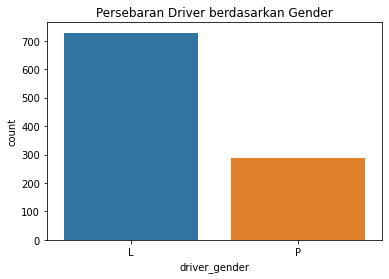

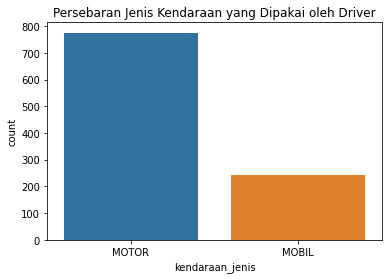

<Figure size 432x288 with 0 Axes>

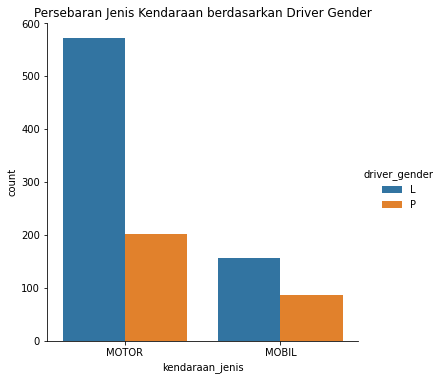

In [104]:
plt.figure()
sns.countplot(data=df, x='driver_gender')
plt.title('Persebaran Driver berdasarkan Gender')
plt.figure()
sns.countplot(data=df, x='kendaraan_jenis')
plt.title('Persebaran Jenis Kendaraan yang Dipakai oleh Driver')
plt.figure()
sns.catplot(x='kendaraan_jenis', hue='driver_gender', data=df, kind='count')
plt.title('Persebaran Jenis Kendaraan berdasarkan Driver Gender')

<Figure size 432x288 with 0 Axes>

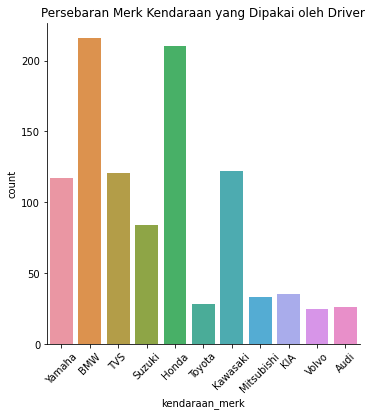

<Figure size 432x288 with 0 Axes>

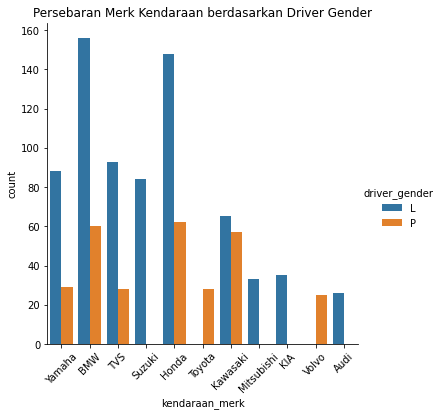

<Figure size 432x288 with 0 Axes>

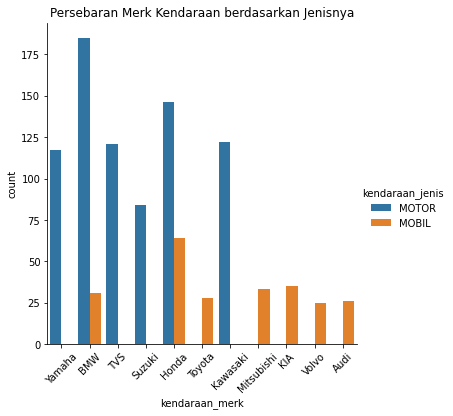

<Figure size 432x288 with 0 Axes>

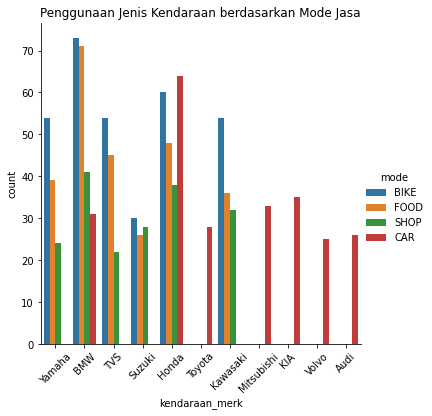

In [123]:
plt.figure()
sns.catplot(data=df, x='kendaraan_merk', kind='count').set_xticklabels(rotation=45)
plt.title('Persebaran Merk Kendaraan yang Dipakai oleh Driver')
plt.figure()
sns.catplot(x='kendaraan_merk', hue='driver_gender', data=df, kind='count').set_xticklabels(rotation=45)
plt.title('Persebaran Merk Kendaraan berdasarkan Driver Gender')
plt.figure()
sns.catplot(x='kendaraan_merk', hue='kendaraan_jenis', data=df, kind='count').set_xticklabels(rotation=45)
plt.title('Persebaran Merk Kendaraan berdasarkan Jenisnya')
plt.figure()
sns.catplot(x='kendaraan_merk', hue='mode', data=df, kind='count').set_xticklabels(rotation=45)
plt.title('Penggunaan Jenis Kendaraan berdasarkan Mode Jasa');

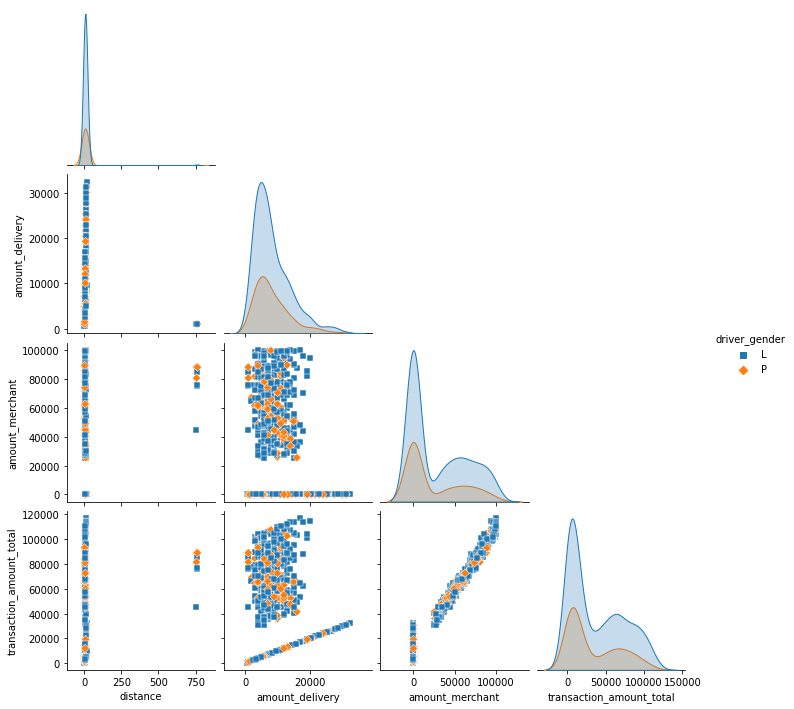

In [106]:
sns.pairplot(df, hue='driver_gender', corner=True, 
             vars=['distance', 'amount_delivery',	'amount_merchant', 'transaction_amount_total'], 
             markers=['s', 'D'])

**Data Customer**

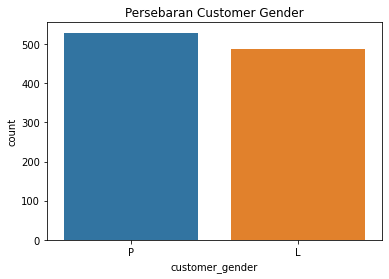

<Figure size 432x288 with 0 Axes>

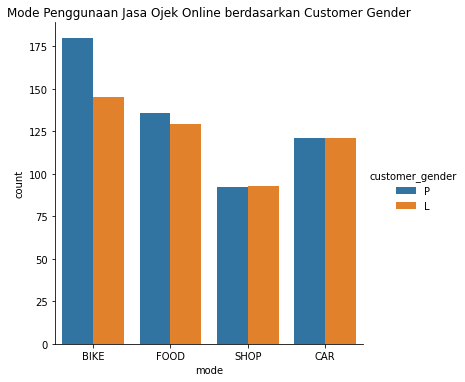

In [107]:
plt.figure()
sns.countplot(data=df, x='customer_gender')
plt.title('Persebaran Customer Gender')
plt.figure()
sns.catplot(x='mode', hue='customer_gender', data=df, kind='count')
plt.title('Mode Penggunaan Jasa Ojek Online berdasarkan Customer Gender');

Text(0.5, 1.0, 'Mode Penggunaan Jasa Ojek Online berdasarkan Jenis Kendaraan yang Dipakai')

<Figure size 432x288 with 0 Axes>

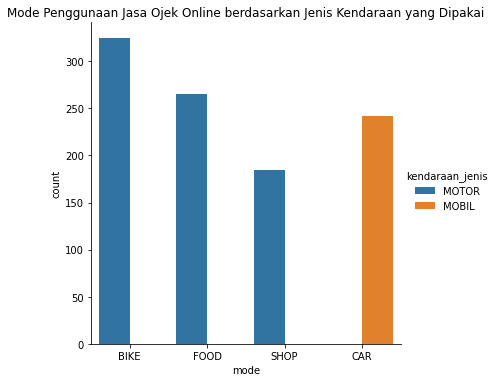

In [108]:
plt.figure()
sns.catplot(x='mode', hue='kendaraan_jenis', data=df, kind='count')
plt.title('Mode Penggunaan Jasa Ojek Online berdasarkan Jenis Kendaraan yang Dipakai')

In [109]:
#Pivot berdasarkan Value Distance
df_pivot_distance = pd.pivot_table(df, index='mode', values='distance', columns='customer_gender', aggfunc='mean')
display(df_pivot_distance)

customer_gender,L,P
mode,,
BIKE,7.986138,8.031667
CAR,7.411322,8.175702
FOOD,41.522171,12.221250
SHOP,6.594301,6.580870


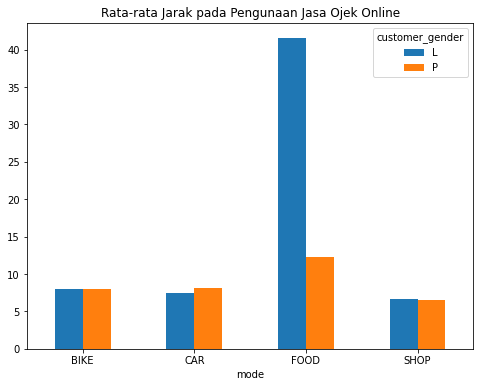

In [110]:
df_pivot_distance.plot(kind='bar', figsize=(8,6), title='Rata-rata Jarak pada Pengunaan Jasa Ojek Online', rot=0)

In [111]:
#Pivot berdasarkan Value Total Jumlah Transaksi
df_pivot_transaction = pd.pivot_table(df, index='mode', values='transaction_amount_total', columns='customer_gender', aggfunc='mean')
display(df_pivot_transaction)

customer_gender,L,P
mode,,
BIKE,3851.724138,3847.222222
CAR,13854.545455,15451.239669
FOOD,71220.930233,70974.264706
SHOP,71462.365591,71081.521739


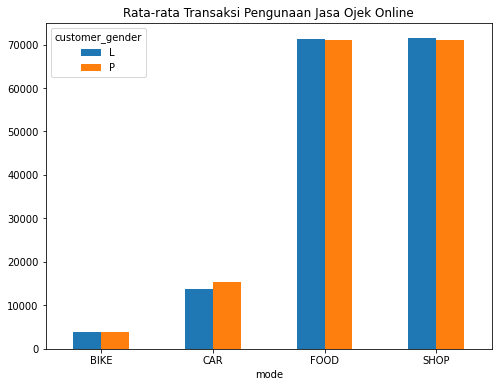

In [112]:
df_pivot_transaction.plot(kind='bar', figsize=(8,6), title='Rata-rata Transaksi Pengunaan Jasa Ojek Online', rot=0)

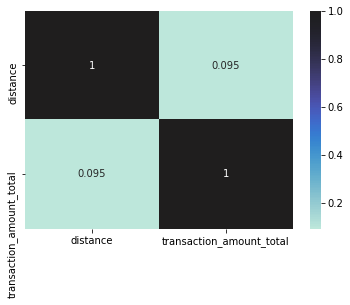

In [113]:
df_heatmap = df[['distance', 'transaction_amount_total']]
sns.heatmap(df_heatmap.corr(), center=1, annot=True)

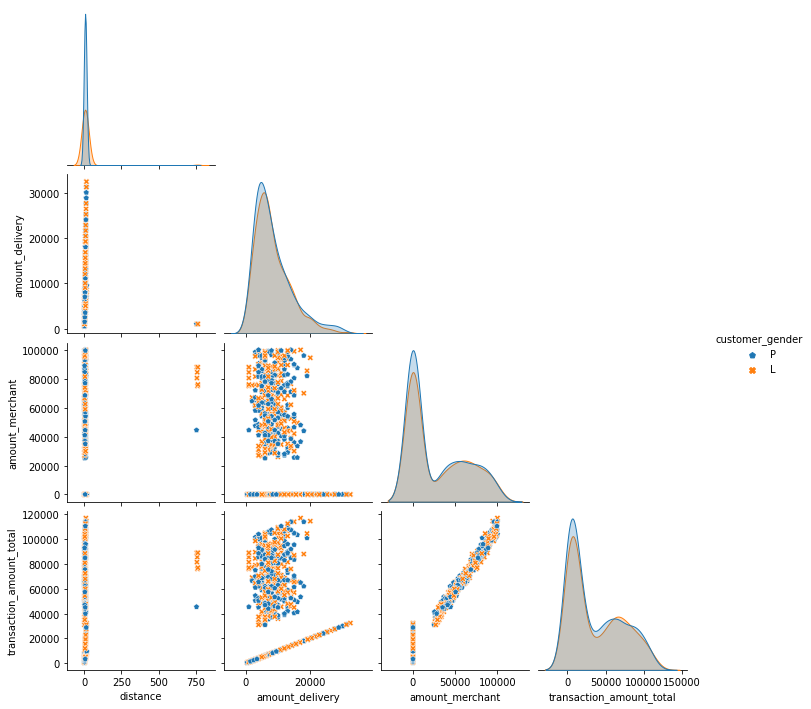

In [114]:
sns.pairplot(df, hue='customer_gender', corner=True, 
             vars=['distance', 'amount_delivery',	'amount_merchant', 'transaction_amount_total'], 
             markers=['p', 'X'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


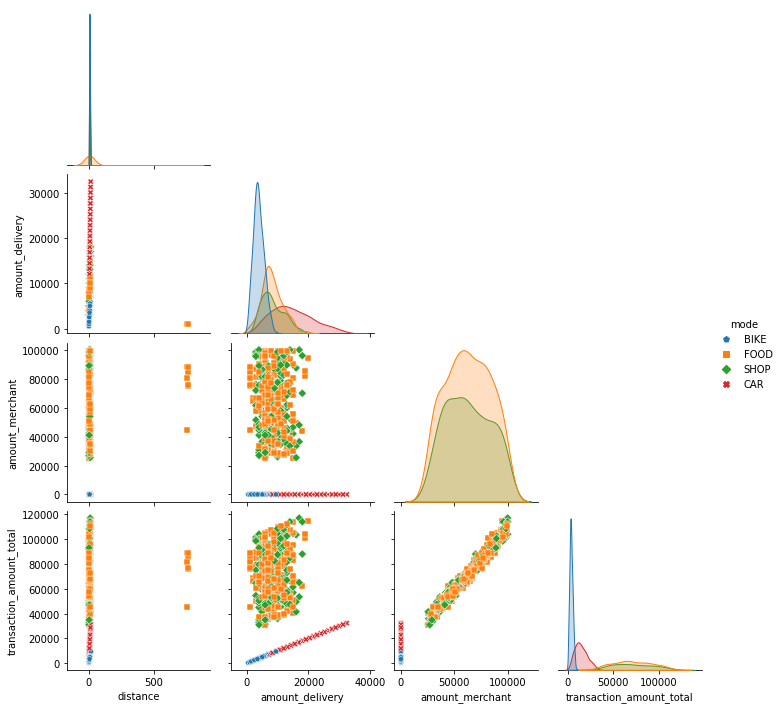

In [115]:
sns.pairplot(df, hue='mode', corner=True, 
             vars=['distance', 'amount_delivery',	'amount_merchant', 'transaction_amount_total'], 
             markers=['p', 's', 'D', 'X'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


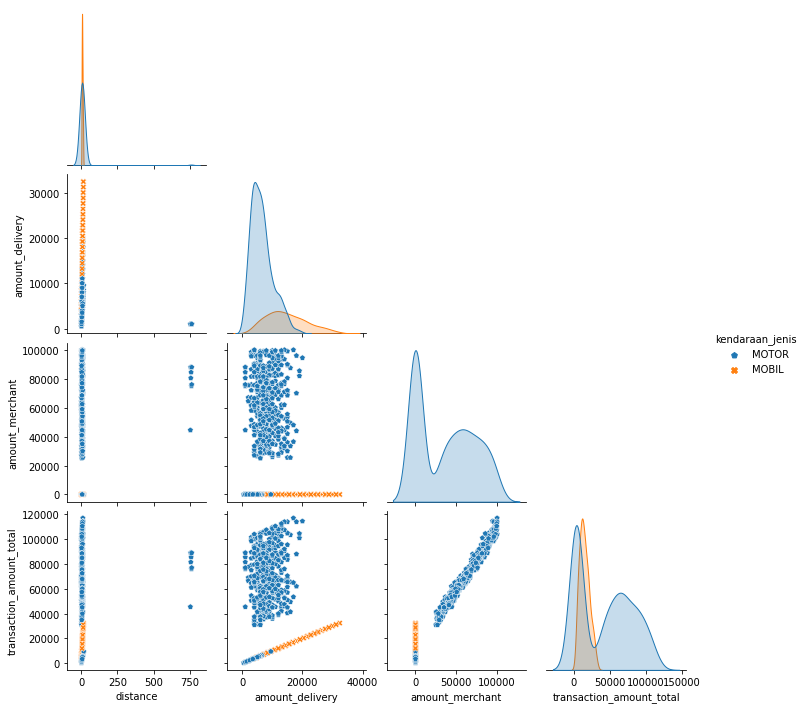

In [116]:
sns.pairplot(df, hue='kendaraan_jenis', corner=True, 
             vars=['distance', 'amount_delivery',	'amount_merchant', 'transaction_amount_total'], 
             markers=['p', 'X'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


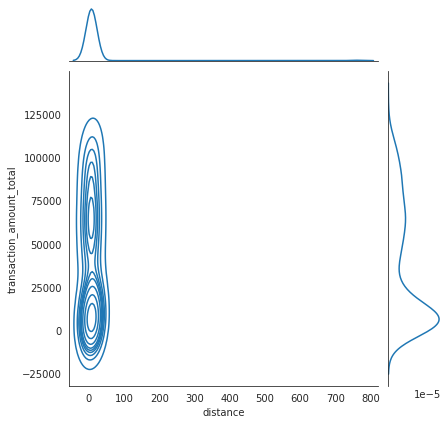

In [117]:
with sns.axes_style('white'):
  sns.jointplot('distance', 'transaction_amount_total', data=df, kind='kde');